

# A short user guide to python tools for visualization and analysis of interferometric data

* ```Interferogram``` class deals with 1D interferograms (time-series data).
* It provides functionality for reading and analysis of such datasets as well for simualtion
* Current analysis tools:
    - Fourier transform
    - Wigner-Ville transform
* Simulations:
    - Pulse profile
    - Interferogram
    

In [1]:
#import packages
import sys
import glob, os
from parse import parse

# set source path
codepath = os.path.abspath("/Users/Pavel/Documents/repos/signal-processing")
if codepath not in sys.path:
    sys.path.append(codepath)

#automatically track changes in the source code
%load_ext autoreload
%autoreload 2

# Experimenal inerferograms

In [2]:
from Interferogram.classes.interferogram import Interferogram

## Display a specific dataset in the current directory

* Initialize an instance of the class by providing all relevant arguments to ```ifgm = Interferogram()```

    * Provide the datapath to a directory of interest
    * Provide the filename to read
    * Set the units of time  and the time step used whilst recording the data


* Read 1D interferometric data by calling the ```read_data()``` method with empty arguments on the instance of the initialized class.              
        
        
* Display the dataset by calling the ```display()```module on the instance of the class. This will automatically compute the 1D Fourier transform of the dataset and display it.

    * Specify the relevant arguments such as the wavelength range to display and the units. 
    * By setting ```vs_wavelength = True ```  one sets the Fourier data to be displayed as a function of wavelength instead of frequency
    * To turn off the display of the temporal data, set ```temporal_data=False```
    * For details see ```help(ifgm.display)```

In [3]:
datapath = os.path.abspath("/Users/Pavel/Documents/project_folder/g2_experiment/data/20210910-delay-tpa/")
filename = "20210910-scan003-10525fs-to-10325fs-step-0.15fs-1exp.txt"

ifgm = Interferogram(pathtodata = datapath, 
                     filetoread = filename, 
                     time_units = "fs", 
                     time_step = 0.15)
ifgm.read_data()
ifgm.display(vs_wavelength=True, 
             wav_min = 350, 
             wav_max = 1000, 
             wav_units = "nm")

ValueError: File path does not exist! Please enter a valid path

## Display all data in any directory

You can also read, analyse and display all data in any directory of interest. It is assumed though that **all data were recorded using the same units of time** (e.g. all datasets have units of e.g. fs)

* Initialize an instance of the class by providing the relevant arguments to ```ifgm = Interferogram()```

    * Provide the datapath to a directory of interest
    * Set the unit of time used whilst recording the data
    * DO NOT set the ```filetoread``` and the ```time_step``` arguments - the code will find them out automatically whilst reading out the data sets.

* Read, analyse and display the dataset by calling the ```display_all()``` module on the instance of the initialized class using the same arguments as with the ```display()``` module.


In [ ]:
datapath = os.path.abspath("/Users/Pavel/Documents/project_folder/g2_experiment/data/20210910-delay-tpa/")

ifgm = Interferogram(pathtodata = datapath, time_units = "fs")

ifgm.display_all(vs_wavelength=True, wav_min=300, wav_max=900, wav_units="nm")

# Simulated interferograms 

In [2]:
from Interferogram.classes.simulation import Simulation

* Set arguments upon the initialization of the Simulation class. See more info in the docstring.

In [15]:
sim = Simulation(lambd=800e-9, t_fwhm=100e-15, t_phase=0, 
                 t_start=-350e-15, t_end=350e-15, delta_t=0.1e-15,
                 tau_start=-350e-15, tau_end=350e-15, delta_tau=0.1e-15)

* Generate an electric field pulse by calling ```gen_e_field```method on he initialised class instance.
* There is an option of displaying the pulse by setting ```plotting=True```


/Users/Pavel/anaconda3/envs/signal-processing/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


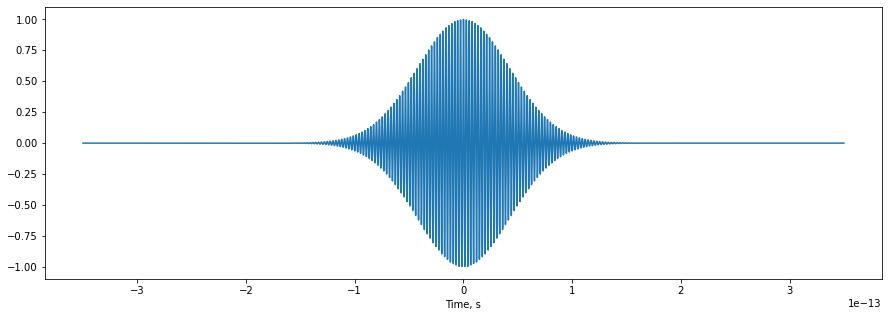

In [16]:
sim.gen_e_field(plotting=True);

* Generate an interferogram by calling ```gen_interferogram``` method on the initialised class instance.
* There is an option of displaying the pulse by setting ```plotting=True```


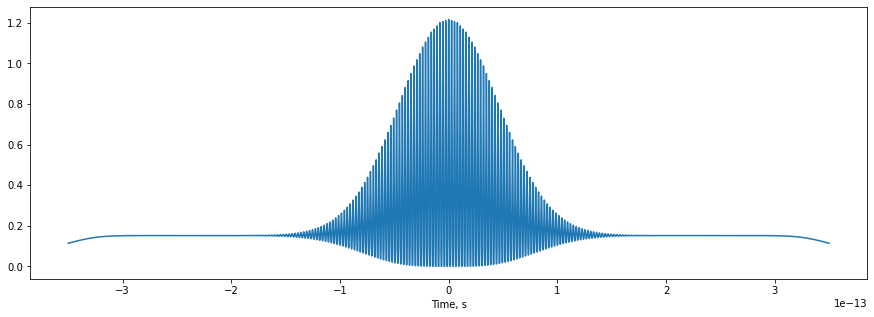

In [17]:
sim.gen_interferogram(plotting=True)

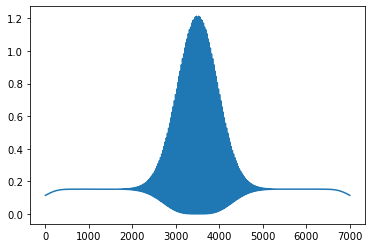

In [55]:
from matplotlib import pyplot as plt
plt.plot(sim.interferogram) 

In [101]:
import tftb
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


#T = 2  # signal duration
dt =  sim.delta_t # sample interval/spacing 1/500
freq_s = 1 / sim.delta_t  # sampling frequency   1/dt
#N = T / dt  # number of samples
ts = sim.time_samples
# np.arange(N) * dt  # times

#  constructing a chirp multiplied by a Gaussian
#t0 = T/2
#freq = np.linspace(10, 30, int(N))
#sigma = 0.1



#signal = sim.interferogram


signal = np.exp(1j * ts * 2 * np.pi * 2e15)

#signal = np.cos((ts-t0) * 2 * np.pi * freq) * np.exp(-(ts-t0)**2/(2*sigma**2))/np.sqrt(sigma)


# adding some noise
#signal += np.random.randn(len(signal))*0.5


#  plotting the signal
#plt.figure()
#plt.plot(ts, signal)
#plt.show()

In [102]:
def get_spectrogram(signal,freq_s,  **kwargs):

    #  compute the spectorgram and the Wigner transform 
    #
    # first looking at the power of the short time fourier transform (SFTF):
    # nperseg = 2**6  # window size of the STFT
    f_stft, t_stft, Zxx = sig.stft(signal, freq_s, **kwargs)
    # shifting the frequency axis for better representation
    Zxx = np.fft.fftshift(Zxx, axes=0)
    f_stft = np.fft.fftshift(f_stft)
  
    return Zxx, f_stft



def get_wigner_ville(ts, signal):

    # Doing the WVT
    wvd = tftb.processing.WignerVilleDistribution(signal, timestamps=ts)
    tfr_wvd, t_wvd, f_wvd = wvd.run()
    # here t_wvd is the same as our ts, and f_wvd are the "normalized frequencies"
    # so we will not use them and construct our own.
    
    return tfr_wvd, t_wvd, f_wvd

In [103]:
def myprint(name, age="30", school=None, teacher=None):
    print("name: ", name)
    print("age: ", age)
    print("school: ", school)
    print("teacher: ", teacher)
    

def userInfo(name, age, **kwargs):
    #
    myprint(name, age, **kwargs)
    
userInfo(name="Petrr", age="30", school="1", teacher="2")



name:  Petrr
age:  30
school:  1
teacher:  2


In [104]:
# compute spectrogram
Zxx, f_stft = get_spectrogram(signal, freq_s, 
                              nperseg = 2**6,
                              noverlap=2**6 - 1, 
                              return_onesided=False)

In [105]:
# compute Wigner-Ville transform
tfr_wvd, t_wvd, f_wvd = get_wigner_ville(ts, signal)

In [106]:
def plot_spectrogram_and_wigner(Zxx, f_stft, tfr_wvd, t_wvd, f_wvd):

    f, axx = plt.subplots(1, 2, figsize=(15,5),  constrained_layout=True)

    df1 = f_stft[1] - f_stft[0]  # the frequency step
    im = axx[0].imshow(np.real(Zxx * np.conj(Zxx)), aspect='auto',
              interpolation=None, origin='lower',
              extent=(ts[0] - dt/2, ts[-1] + dt/2,
                      f_stft[0] - df1/2, f_stft[-1] + df1/2))
    axx[0].set_ylabel('frequency [Hz]')
    plt.colorbar(im, ax=axx[0])
    axx[0].set_title('spectrogram')

    print("Spectrogram shape ", Zxx.shape)
    print("WT shape ", Zxx.shape)


    # because of how they implemented WVT, the maximum frequency is half of
    # the sampling Nyquist frequency, so 125 Hz instead of 250 Hz, and the sampling
    # is 2 * dt instead of dt
    f_wvd = np.fft.fftshift(np.fft.fftfreq(tfr_wvd.shape[0], d=2 * dt))
    df_wvd = f_wvd[1]-f_wvd[0]  # the frequency step in the WVT
    im = axx[1].imshow(np.fft.fftshift(tfr_wvd, axes=0), aspect='auto', origin='lower',
           extent=(ts[0] - dt/2, ts[-1] + dt/2,
                   f_wvd[0]-df_wvd/2, f_wvd[-1]+df_wvd/2))
    axx[1].set_xlabel('time [s]')
    axx[1].set_ylabel('frequency [Hz]')
    plt.colorbar(im, ax=axx[1])
    axx[1].set_title('Wigner-Ville Transform')
    plt.show()

Spectrogram shape  (64, 7001)
WT shape  (64, 7001)


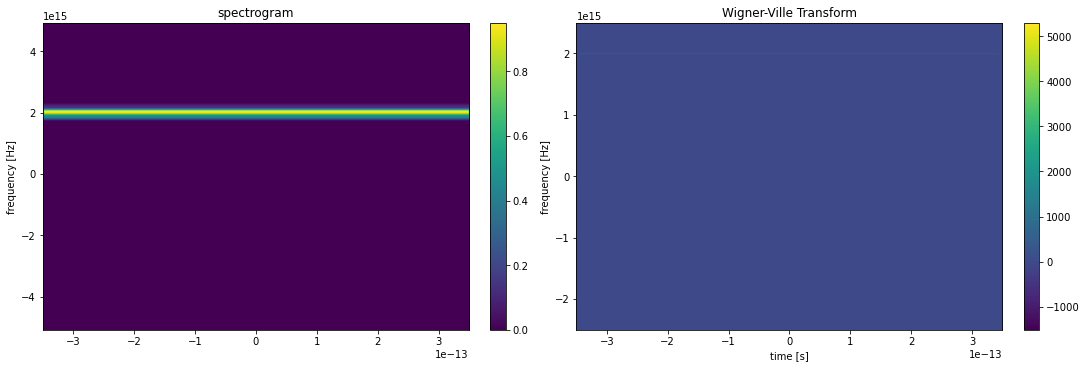

In [107]:
plot_spectrogram_and_wigner(Zxx, f_stft, tfr_wvd, t_wvd, f_wvd)

In [113]:
f_stft, t_stft, signal_stft = sim.compute_spectrogram(signal, freq_s, nperseg=2**6)

/Users/Pavel/anaconda3/envs/signal-processing/lib/python3.9/site-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


In [111]:
def plot_spectrogram(signal_stft, f_stft):

    f, axx = plt.subplots(1, 2, figsize=(15,5),  constrained_layout=True)

    df1 = f_stft[1] - f_stft[0]  # the frequency step
    
    im = axx[0].imshow(np.real(signal_stft * np.conj(signal_stft)), aspect='auto',
              interpolation=None, origin='lower',
              extent=(sim.time_samples[0] - sim.delta_t/2, sim.time_samples[-1] + sim.delta_t/2,
                      f_stft[0] - df1/2, f_stft[-1] + df1/2))
    axx[0].set_ylabel('frequency [Hz]')
    plt.colorbar(im, ax=axx[0])
    axx[0].set_title('spectrogram')

    print("Spectrogram shape ", Zxx.shape)
    print("WT shape ", Zxx.shape)


    plt.show()

Spectrogram shape  (64, 7001)
WT shape  (64, 7001)


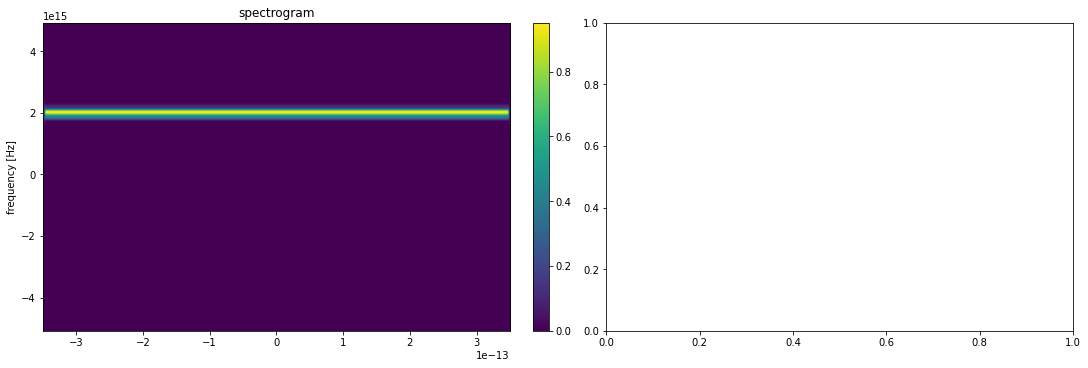

In [114]:
plot_spectrogram(signal_stft, f_stft)

In [125]:
from decimal import Decimal
freq = 3e8 / 100.5e-9
'{:.6e}'.format(freq)

'2.985075e+15'